In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from matplotlib import rcParams

rcParams.update({'figure.autolayout': True})

In [7]:
data = pd.read_csv("data_husky.csv", low_memory=False)

In [8]:
def power_model(Crr,nbw,Wt,g,v,Z,a):
    return Crr*Wt*g*v/nbw + (Wt*g*v*Z+0.5*Wt*v*a)/nbw

In [9]:
g = 9.81

# Starship
W_starship = 23 # kg
v_starship = 1.7 # m/s
payload_starship = 10 # kg 

W_scout = 45 # kg
v_scout = 6.7 # m/s
payload_scout = 23 # kg 

# Monte Carlo Simulation
n = int(1e6)
Crr = np.random.triangular(0.01,0.07,0.1, size=n)
nbw = np.random.triangular(0.03,0.60,0.9, size=n)
Z = np.random.triangular(np.arctan(np.radians(-5)), 0, np.arctan(np.radians(5)), size=n)


Wt_starship = np.random.triangular(W_starship + payload_starship*0.3,W_starship + payload_starship*0.7,W_starship + payload_starship, size=n)
v_starship = np.random.triangular(v_starship*0.3,v_starship*0.7,v_starship, size=n)
a_starship = np.random.triangular(0,0.5,2, size=n)

Wt_scout = np.random.triangular(W_scout + payload_scout*0.3,W_scout + payload_scout*0.7,W_scout + payload_scout, size=n)
v_scout = np.random.triangular(v_scout*0.3,v_scout*0.7,v_scout, size=n)
a_scout = np.random.triangular(0,5,10, size=n)

df = pd.DataFrame({"Crr":Crr, "nbw":nbw,"Z":Z,"Wt_starship":Wt_starship, "v_starship":v_starship, "a_starship":a_starship,
                  'Wt_scout':Wt_scout, "v_scout": v_scout, "a_scout":a_scout})


In [10]:
df['power_starship'] = df.Crr*df.Wt_starship*g*df.v_starship/df.nbw + (df.Wt_starship*g*v_starship*Z+0.5*Wt_starship*v_starship*a_starship)/nbw
df['power_scout'] = df.Crr*df.Wt_scout*g*df.v_scout/df.nbw + (df.Wt_scout*g*v_scout*Z+0.5*Wt_scout*v_scout*a_scout)/nbw

C:\Users\thiag\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


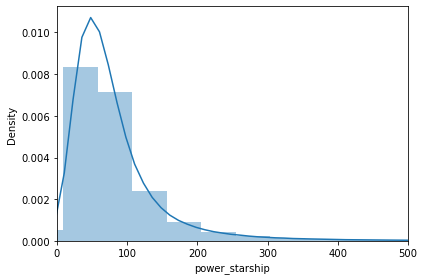

In [14]:
sns.distplot(df.power_starship)
plt.xlim(0,500)
plt.show()

In [6]:
print(df.power_scout.median())

1585.1222183708596
